In [1]:
from plotnine import *
import numpy as np
import pandas as pd

In [2]:
barabasi_mod = pd.read_csv("barabasi_benchmark/unified_res/barabasi_unified_1.csv")
barabasi_e = pd.read_csv("barabasi_benchmark/unified_res/e_barabasi_unified_1.csv")

In [3]:
erdos_mod = pd.read_csv("erdos_benchmark/unified_res/erdos_unified_1.csv")
erdos_e = pd.read_csv("erdos_benchmark/unified_res/e_erdos_unified_1.csv")

In [4]:
star_mod = pd.read_csv("star_benchmark/unified_res/star_unified_1.csv")
star_e = pd.read_csv("star_benchmark/unified_res/e_star_unified_1.csv")

In [5]:
useful_columns = ['vertex_num', 'constant', 'avg_route_len', 'dan', 'delta', 'max_delta', 'real_congestion', 'type', 'start_entropy']

In [6]:
barabasi_mod = barabasi_mod[useful_columns]
#barabasi_e = barabasi_e[useful_columns]
erdos_mod = erdos_mod[useful_columns]
#erdos_e = erdos_e[useful_columns]
star_mod = star_mod[useful_columns]
#star_e = star_e[useful_columns]

In [7]:
gd_barabasi_mod = barabasi_mod[barabasi_mod['constant'] == 5]
gd_barabasi_e = barabasi_e[barabasi_e['constant'] == 5]
gd_erdos_mod = erdos_mod[erdos_mod['constant'] == 5]
gd_erdos_e = erdos_e[erdos_e['constant'] == 5]
gd_star_mod = star_mod[star_mod['constant'] == 5]
gd_star_e = star_e[star_e['constant'] == 5]

In [8]:
aggr_barabasi_mod = pd.DataFrame()
for t in gd_barabasi_mod['type'].unique():
    z = gd_barabasi_mod[gd_barabasi_mod['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max', 'start_entropy': 'mean'})
    z['type'] = t
    aggr_barabasi_mod = aggr_barabasi_mod.append(z)

In [9]:
aggr_barabasi_e = pd.DataFrame()
for t in gd_barabasi_e['type'].unique():
    z = gd_barabasi_e[gd_barabasi_e['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max'})
    z['type'] = t
    aggr_barabasi_e = aggr_barabasi_e.append(z)

In [10]:
aggr_erdos_mod = pd.DataFrame()
for t in gd_erdos_mod['type'].unique():
    z = gd_erdos_mod[gd_erdos_mod['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max', 'start_entropy': 'mean'})
    z['type'] = t
    aggr_erdos_mod = aggr_erdos_mod.append(z)

In [11]:
aggr_erdos_e = pd.DataFrame()
for t in gd_erdos_e['type'].unique():
    z = gd_erdos_e[gd_erdos_e['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max'})
    z['type'] = t
    aggr_erdos_e = aggr_erdos_e.append(z)

In [12]:
aggr_star_e = pd.DataFrame()
for t in gd_star_e['type'].unique():
    z = gd_star_e[gd_star_e['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max'})
    z['type'] = t
    aggr_star_e = aggr_star_e.append(z)

In [13]:
aggr_star_mod = pd.DataFrame()
for t in gd_star_mod['type'].unique():
    z = gd_star_mod[gd_star_mod['type'] == t].groupby('vertex_num').agg({'avg_route_len': 'mean', 'real_congestion': 'mean', 'max_delta': 'max', 'start_entropy': 'mean'})
    z['type'] = t
    aggr_star_mod = aggr_star_mod.append(z)

## Úthossz

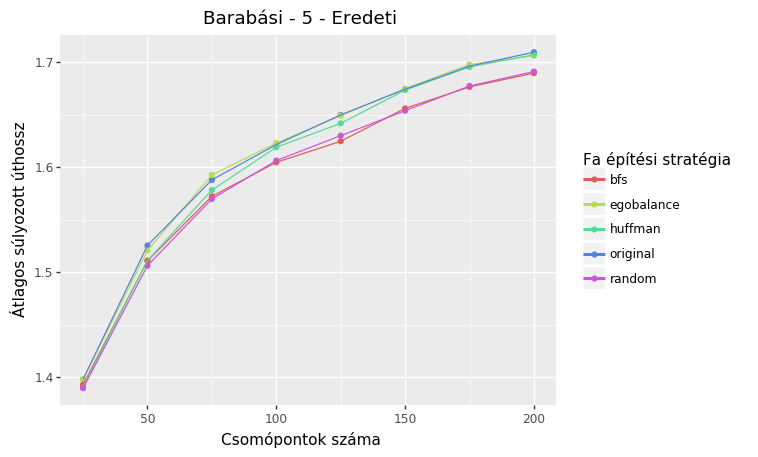

<ggplot: (130807290779)>

In [14]:
qe_barabasi_route = ggplot(aggr_barabasi_e, aes(x=aggr_barabasi_e.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Eredeti')
qe_barabasi_route

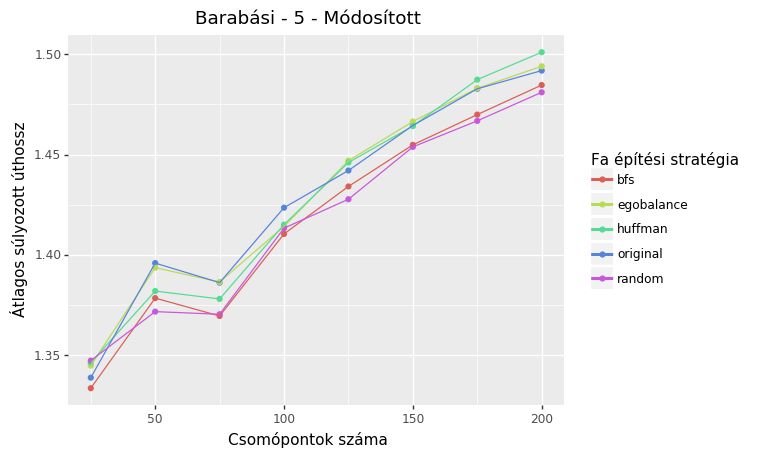

<ggplot: (-9223371906048099787)>

In [15]:
qm_barabasi_route = ggplot(aggr_barabasi_mod, aes(x=aggr_barabasi_mod.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Módosított')
qm_barabasi_route

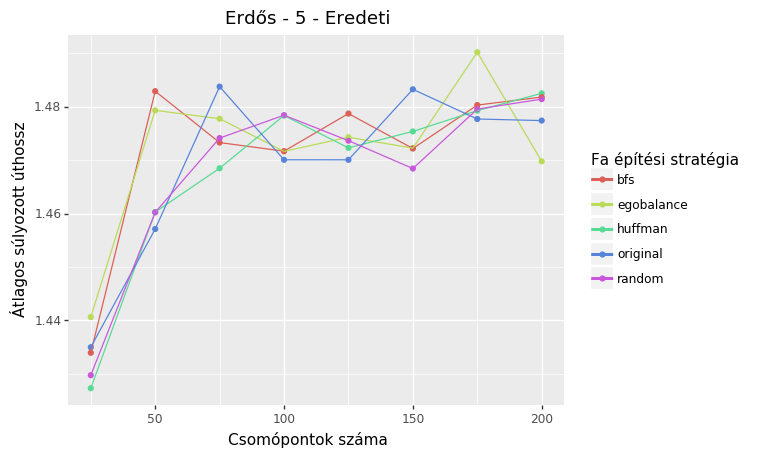

<ggplot: (130805179712)>

In [16]:
qe_erdos_route = ggplot(aggr_erdos_e, aes(x=aggr_erdos_e.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Erdős - 5 - Eredeti')
qe_erdos_route

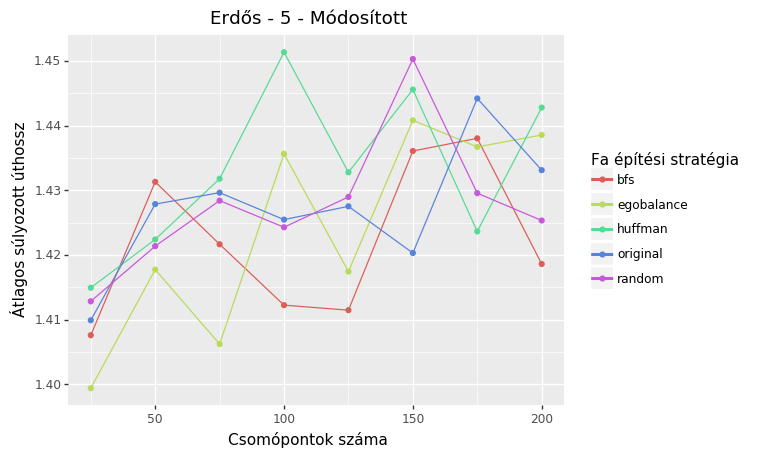

<ggplot: (130805169935)>

In [17]:
qm_erdos_route = ggplot(aggr_erdos_mod, aes(x=aggr_erdos_mod.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Erdős - 5 - Módosított')
qm_erdos_route

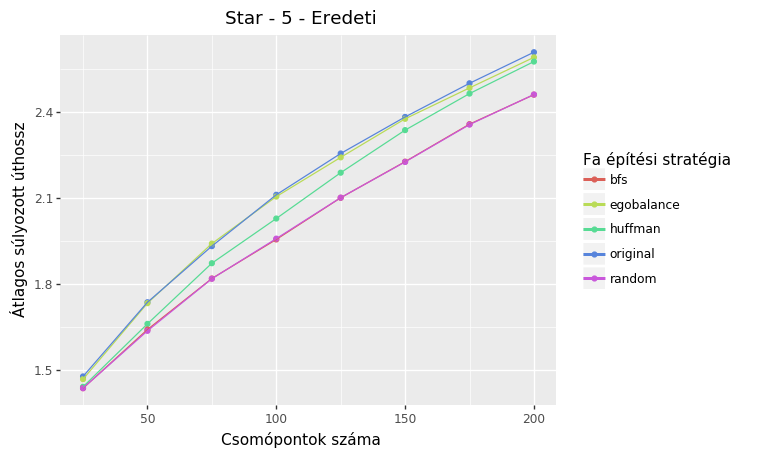

<ggplot: (130805367030)>

In [18]:
qe_star_route = ggplot(aggr_star_e, aes(x=aggr_star_e.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Star - 5 - Eredeti')
qe_star_route

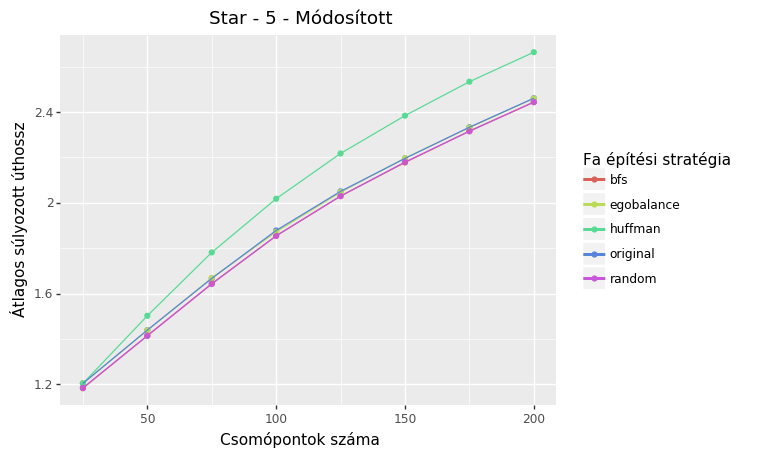

<ggplot: (-9223371906049364164)>

In [19]:
qm_star_route = ggplot(aggr_star_mod, aes(x=aggr_star_mod.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Star - 5 - Módosított')
qm_star_route

## Torlódás

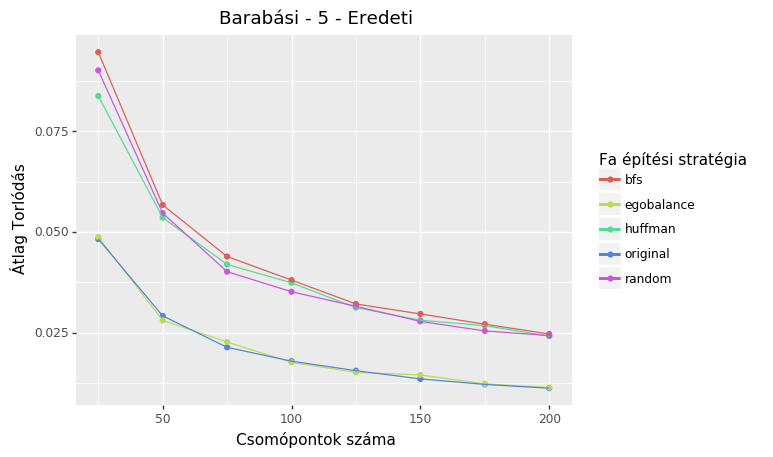

<ggplot: (-9223371906048581397)>

In [20]:
qe_barabasi_con = ggplot(aggr_barabasi_e, aes(x=aggr_barabasi_e.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Eredeti')
qe_barabasi_con

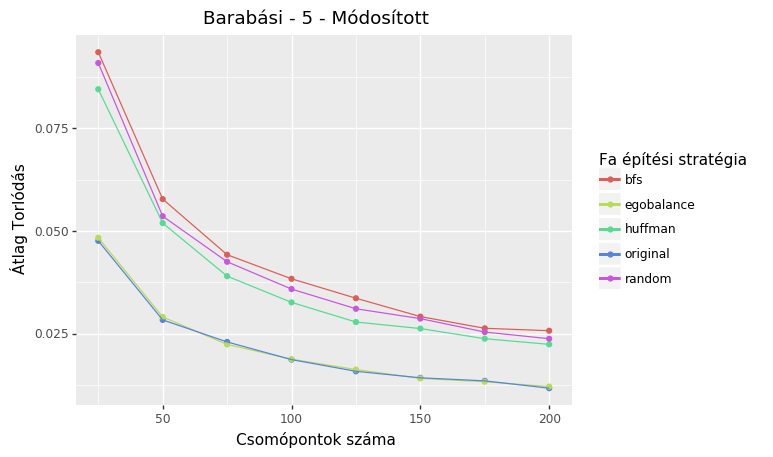

<ggplot: (130806657130)>

In [21]:
qm_barabasi_con = ggplot(aggr_barabasi_mod, aes(x=aggr_barabasi_mod.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Módosított')
qm_barabasi_con

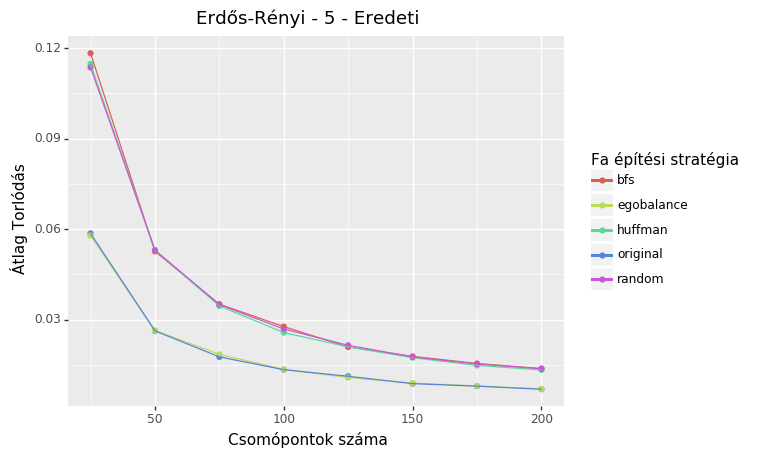

<ggplot: (-9223371906048151471)>

In [22]:
qe_erdos_con = ggplot(aggr_erdos_e, aes(x=aggr_erdos_e.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Erdős-Rényi - 5 - Eredeti')
qe_erdos_con

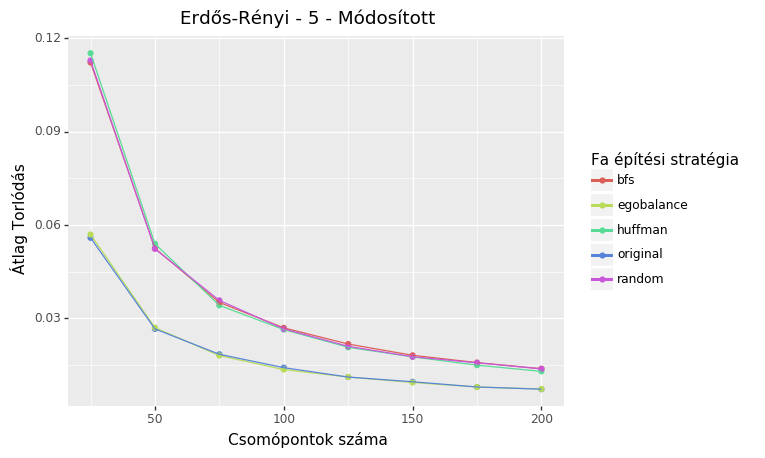

<ggplot: (-9223371906048163156)>

In [23]:
qm_erdos_con = ggplot(aggr_erdos_mod, aes(x=aggr_erdos_mod.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Erdős-Rényi - 5 - Módosított')
qm_erdos_con

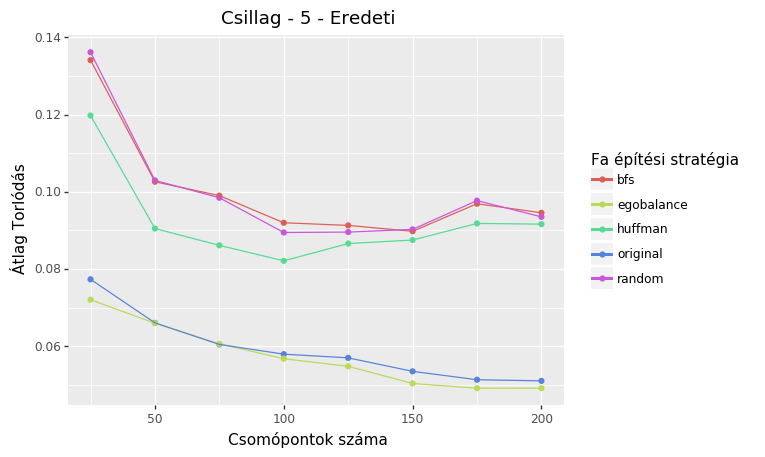

<ggplot: (130806201243)>

In [24]:
qe_star_con = ggplot(aggr_star_e, aes(x=aggr_star_e.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Csillag - 5 - Eredeti')
qe_star_con

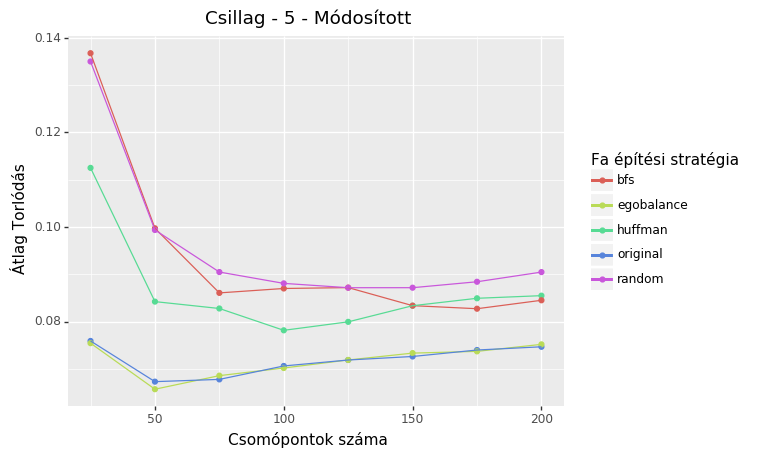

<ggplot: (-9223371906048574520)>

In [25]:
qm_star_con = ggplot(aggr_star_mod, aes(x=aggr_star_mod.index, y='real_congestion', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Csillag - 5 - Módosított')
qm_star_con

In [26]:
vertex_num = [25, 50, 75, 100, 125, 150, 175, 200]
x = pd.DataFrame(map(lambda z: 1/z, vertex_num), index=vertex_num)
x['type'] = '1/x'

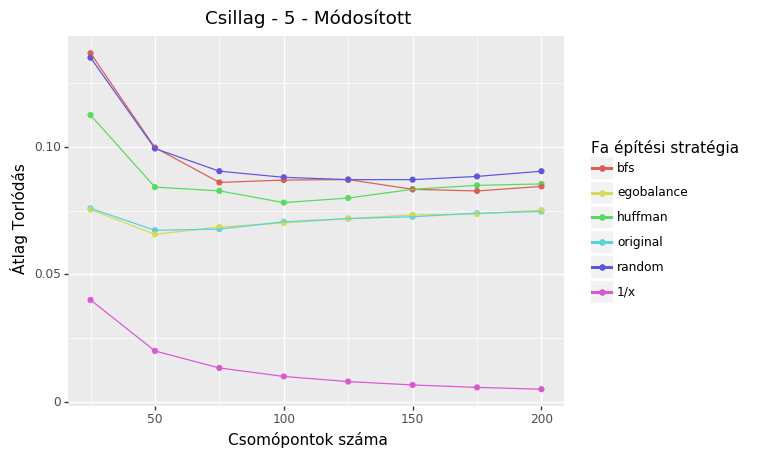

<ggplot: (-9223371906048167392)>

In [27]:
qm_star_con\
    + geom_line(x, aes(x=x.index, y=x[0])) \
    + geom_point(x, aes(x=x.index, y=x[0]))

In [28]:
aggr_barabasi_e['num'] = aggr_barabasi_e.index

In [29]:
aggr_barabasi_mod['num'] = aggr_barabasi_mod.index

In [30]:
aggr_barabasi_e['div_con'] = aggr_barabasi_e.apply(lambda x: x['real_congestion'] / (1/x.num),axis=1)

In [31]:
aggr_barabasi_mod['div_con'] = aggr_barabasi_mod.apply(lambda x: x['real_congestion'] / (1/x.num),axis=1)

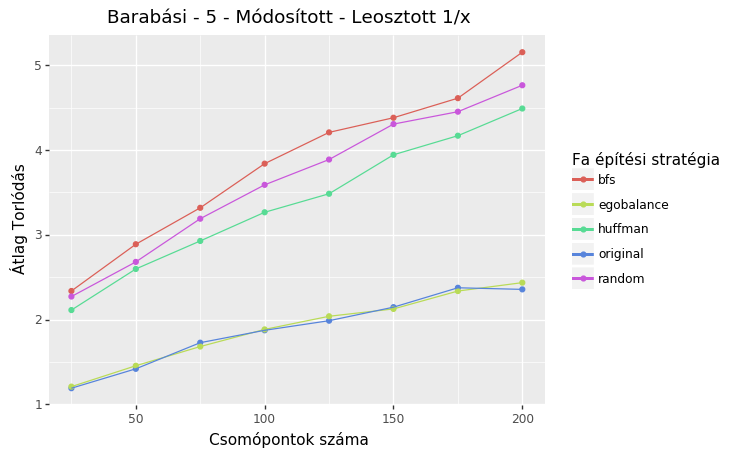

<ggplot: (-9223371906048167038)>

In [32]:
qz_barabasi_con = ggplot(aggr_barabasi_mod, aes(x=aggr_barabasi_mod.index, y='div_con', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Módosított - Leosztott 1/x')
qz_barabasi_con

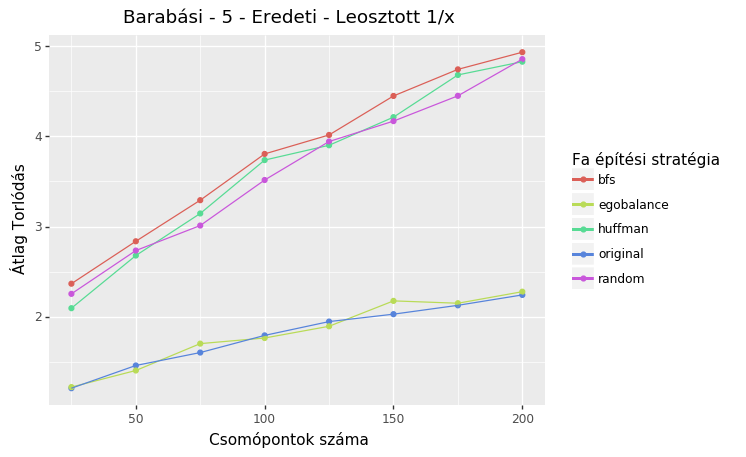

<ggplot: (130805342735)>

In [33]:
qy_barabasi_con = ggplot(aggr_barabasi_e, aes(x=aggr_barabasi_e.index, y='div_con', color='type')) \
    + geom_point() \
    + geom_line() \
    + scale_y_continuous() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Barabási - 5 - Eredeti - Leosztott 1/x')
qy_barabasi_con

In [34]:
aggr_erdos_mod['num'] = aggr_erdos_mod.index

In [35]:
aggr_erdos_mod['div_con'] = aggr_erdos_mod.apply(lambda x: x['real_congestion'] / (1/x.num),axis=1)

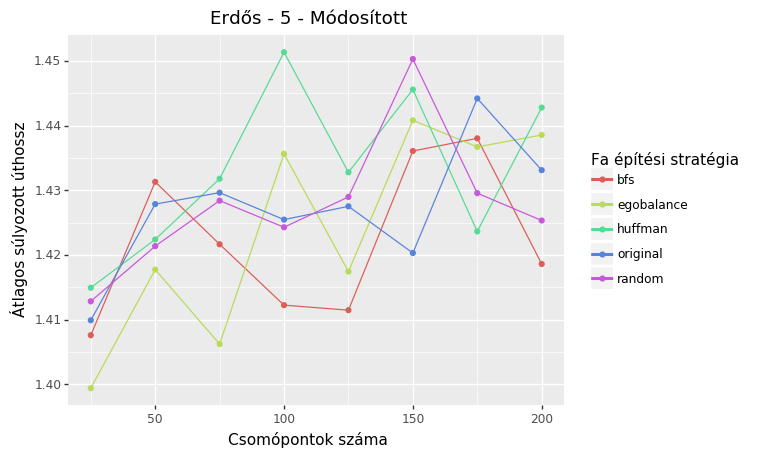

<ggplot: (130805421260)>

In [36]:
qm_erdos_route = ggplot(aggr_erdos_mod, aes(x=aggr_erdos_mod.index, y='avg_route_len', color='type')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Fa építési stratégia') \
    + ggtitle('Erdős - 5 - Módosított')
qm_erdos_route

In [37]:
z = aggr_barabasi_mod.groupby('vertex_num').agg({'start_entropy': 'mean'})
z['type'] = 'barabasi'
z

,start_entropy,type
vertex_num,,
25,4.514456,barabasi
50,5.457229,barabasi
75,6.000451,barabasi
100,6.389872,barabasi
125,6.692133,barabasi
150,6.938742,barabasi
175,7.146985,barabasi
200,7.331685,barabasi


In [38]:
indicies = [25, 50, 75, 100, 125, 150, 175, 200]

In [39]:
nums = np.log2(indicies)

In [40]:
log2_data = pd.Series(nums, index=indicies)

In [41]:
log2_data = pd.DataFrame(log2_data)

In [42]:
z

,start_entropy,type
vertex_num,,
25,4.514456,barabasi
50,5.457229,barabasi
75,6.000451,barabasi
100,6.389872,barabasi
125,6.692133,barabasi
150,6.938742,barabasi
175,7.146985,barabasi
200,7.331685,barabasi


In [43]:
log2_data = log2_data.rename(columns={0: 'start_entropy'})
log2_data['type'] = 'log2'

In [44]:
log2_data

,start_entropy,type
25,4.643856,log2
50,5.643856,log2
75,6.228819,log2
100,6.643856,log2
125,6.965784,log2
150,7.228819,log2
175,7.451211,log2
200,7.643856,log2


In [45]:
z2 = aggr_erdos_mod.groupby('vertex_num').agg({'start_entropy': 'mean'})
z2['type'] = 'erdos'
z2

,start_entropy,type
vertex_num,,
25,4.523438,erdos
50,5.510363,erdos
75,6.090000,erdos
100,6.500015,erdos
125,6.820799,erdos
150,7.082594,erdos
175,7.304479,erdos
200,7.496948,erdos


In [46]:
z3 = aggr_star_mod.groupby('vertex_num').agg({'start_entropy': 'mean'})
z3['type'] = 'star'
z3

,start_entropy,type
vertex_num,,
25,4.202866,star
50,4.817899,star
75,5.152707,star
100,5.382223,star
125,5.556059,star
150,5.697495,star
175,5.815873,star
200,5.917932,star


In [47]:
z1 = pd.DataFrame()

In [48]:
frames = [log2_data, z, z2, z3]
z1 = pd.concat(frames)
z1

,start_entropy,type
25,4.643856,log2
50,5.643856,log2
75,6.228819,log2
100,6.643856,log2
125,6.965784,log2
150,7.228819,log2
175,7.451211,log2
200,7.643856,log2
25,4.514456,barabasi
50,5.457229,barabasi


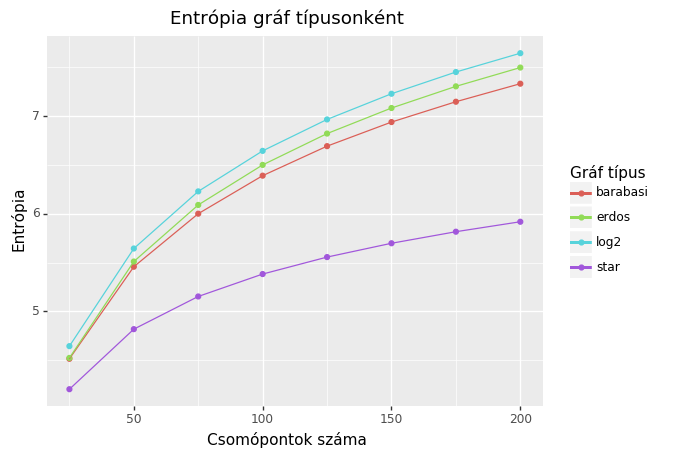

<ggplot: (130806137864)>

In [49]:
q_entropy = ggplot(z1, aes(x=z1.index, y='start_entropy', color='factor(type)')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Entrópia') \
    + labs(color='Gráf típus') \
    + ggtitle('Entrópia gráf típusonként')
q_entropy

In [50]:
barabasi_e[(barabasi_e['constant'] == 5 or barabasi_e['constant'] == 2 or barabasi_e['constant'] == 8) and barabasi_e['type'] == 'original']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
suruseg = barabasi_e[barabasi_e['constant'].isin([2,5,8])]
suruseg = suruseg[suruseg['type'] == 'original']
suruseg

,graph,vertex_num,constant,congestion,real_congestion,avg_route_len,delta,max_delta,dan,most_congested_route,max_route_len,avg_tree_weight,most_tree_ratio,tree_count,type,start_entropy
20,barabasi-albert,25,2,6.0,0.065217,1.434783,10,8,10,"[T0 W: 0, T7 W: 1.0, T2 W: 0]",2,0.074275,1.714286,12,original,4.442071
21,barabasi-albert,25,2,8.0,0.086957,1.434783,10,10,10,"[T4 W: 0, T23 W: 2.0, T8 W: 0]",2,0.076087,1.750000,12,original,4.339946
22,barabasi-albert,25,2,6.0,0.065217,1.434783,10,9,10,"[T1 W: 0, T17 W: 1.0, T4 W: 0]",2,0.076087,1.666667,12,original,4.365818
23,barabasi-albert,25,2,12.0,0.130435,1.478261,10,10,10,"[T2 W: 0, T23 W: 1.0, T22 W: 2.0]",2,0.071558,1.714286,12,original,4.413288
24,barabasi-albert,25,2,6.0,0.065217,1.456522,10,9,10,"[T1 W: 0, T0 W: 1.0, T2 W: 0]",2,0.077899,1.600000,12,original,4.330498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31155,barabasi-albert,200,8,14.0,0.004557,1.483724,48,46,48,"[T8 W: 0, T93 W: 2.0, T9 W: 0]",3,0.008890,2.315789,100,original,7.409844
31156,barabasi-albert,200,8,14.0,0.004557,1.492839,48,48,48,"[T5 W: 0, T199 W: 1.0, T87 W: 2.0, T11 W: 0]",3,0.008919,2.493506,100,original,7.377626
31157,barabasi-albert,200,8,14.0,0.004557,1.497396,48,48,48,"[T11 W: 0, T198 W: 2.0, T190 W: 1.0, T18 W: 0]",3,0.008893,2.181818,100,original,7.382560
31158,barabasi-albert,200,8,14.0,0.004557,1.506510,48,48,48,"[T0 W: 0, T112 W: 2.0, T186 W: 1.0, T8 W: 0]",3,0.008838,2.461538,100,original,7.373872


In [52]:
uc1 = ['vertex_num', 'constant', 'avg_route_len', 'real_congestion']
s1 = suruseg[uc1]
s1

,vertex_num,constant,avg_route_len,real_congestion
20,25,2,1.434783,0.065217
21,25,2,1.434783,0.086957
22,25,2,1.434783,0.065217
23,25,2,1.478261,0.130435
24,25,2,1.456522,0.065217
...,...,...,...,...
31155,200,8,1.483724,0.004557
31156,200,8,1.492839,0.004557
31157,200,8,1.497396,0.004557
31158,200,8,1.506510,0.004557


In [53]:
as1 = s1.groupby(['vertex_num', 'constant']).agg({'avg_route_len': 'mean', 'real_congestion': 'mean'})
as1

avg_route_len  real_congestion
vertex_num constant                                
25         2              1.444565         0.077717
           5              1.398000         0.048250
           8              1.401287         0.040993
50         2              1.502344         0.042187
           5              1.525500         0.029167
           8              1.565476         0.025818
75         2              1.539469         0.033305
           5              1.587893         0.021357
           8              1.676189         0.019450
100        2              1.544834         0.026658
           5              1.621474         0.017921
           8              1.729229         0.015421
125        2              1.549035         0.023018
           5              1.649750         0.015562
           8              1.770433         0.012954
150        2              1.571875         0.021453
           5              1.674172         0.013517
           8              1.806668         0.012060
175        2              1.582262         0.019653
           5              1.696162         0.012147
           8              1.835479         0.010956
200        2              1.586143         0.017898
           5              1.709397         0.011205
           8              1.855086         0.009888

In [54]:
as1 = as1.reset_index()

In [55]:
as1

,vertex_num,constant,avg_route_len,real_congestion
0,25,2,1.444565,0.077717
1,25,5,1.398000,0.048250
2,25,8,1.401287,0.040993
3,50,2,1.502344,0.042187
4,50,5,1.525500,0.029167
5,50,8,1.565476,0.025818
6,75,2,1.539469,0.033305
7,75,5,1.587893,0.021357
8,75,8,1.676189,0.019450
9,100,2,1.544834,0.026658


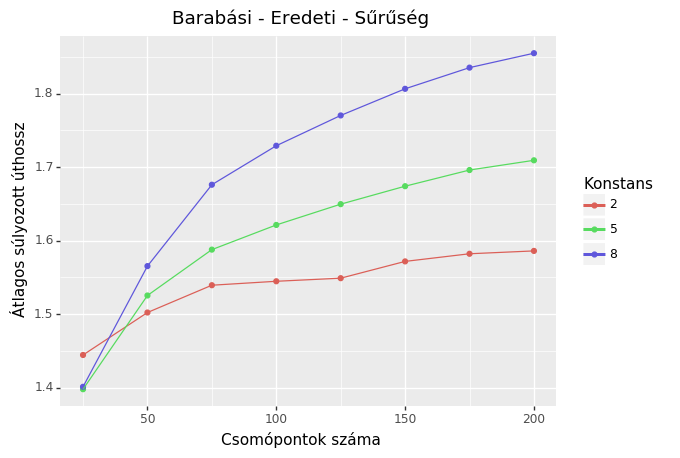

<ggplot: (-9223371906047771388)>

In [56]:
zz1 = ggplot(as1, aes(x='vertex_num', y='avg_route_len', color='factor(constant)')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlagos súlyozott úthossz') \
    + labs(color='Konstans') \
    + ggtitle('Barabási - Eredeti - Sűrűség')
zz1

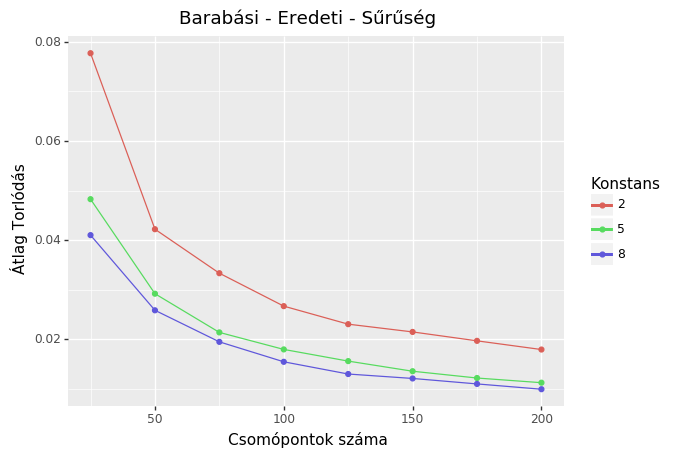

<ggplot: (-9223371906049346293)>

In [57]:
zz2 = ggplot(as1, aes(x='vertex_num', y='real_congestion', color='factor(constant)')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Átlag Torlódás') \
    + labs(color='Konstans') \
    + ggtitle('Barabási - Eredeti - Sűrűség')
zz2

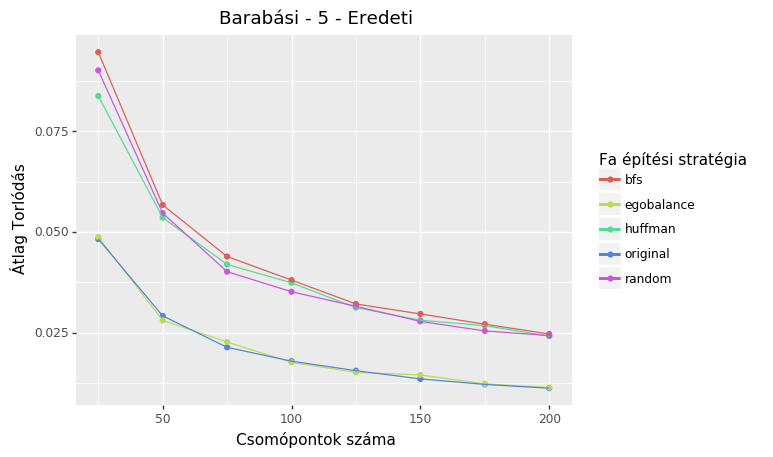

<ggplot: (-9223371906048581397)>


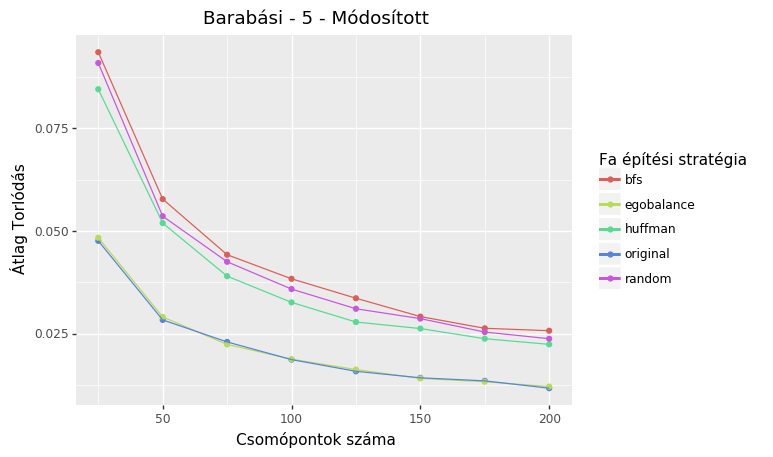

<ggplot: (130806657130)>


In [58]:
print(qe_barabasi_con)
print(qm_barabasi_con)

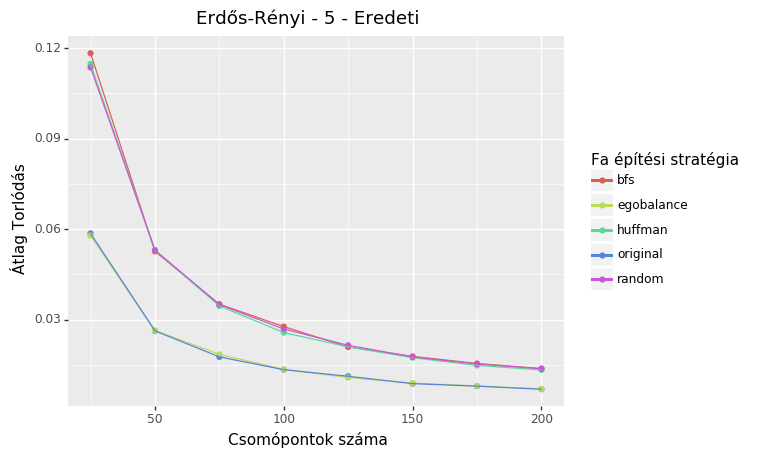

<ggplot: (-9223371906048151471)>


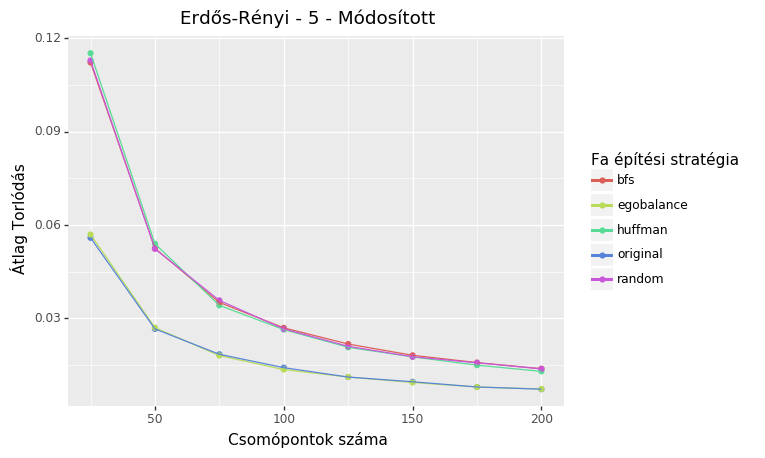

<ggplot: (-9223371906048163156)>


In [59]:
print(qe_erdos_con)
print(qm_erdos_con)

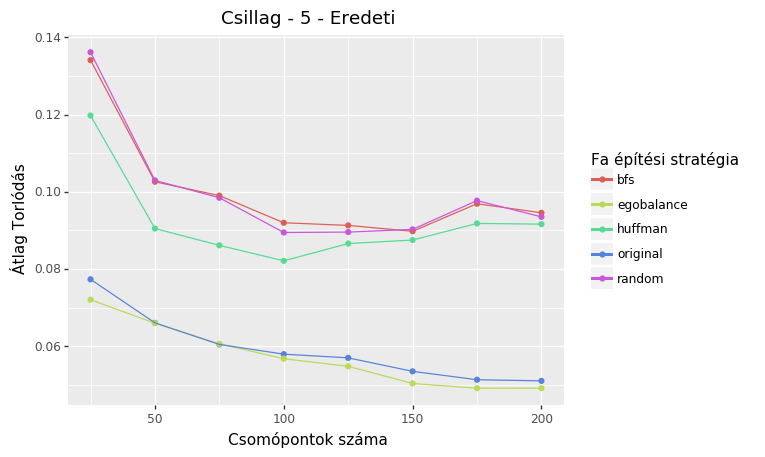

<ggplot: (130806201243)>


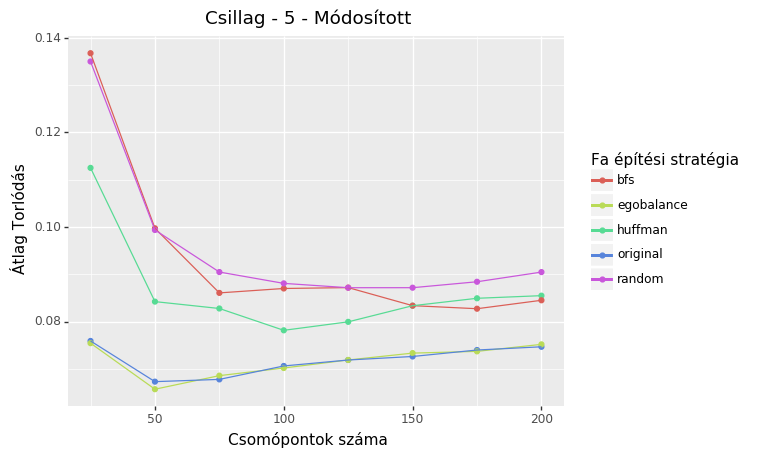

<ggplot: (-9223371906048574520)>


In [60]:
print(qe_star_con)
print(qm_star_con)

In [61]:
qe_star_con += theme(legend_text=element_text(size=12))

In [62]:
qm_star_con += theme(legend_text=element_text(size=12)) 

In [63]:
qe_star_route += theme(legend_text=element_text(size=12)) 

In [64]:
qm_star_route += theme(legend_text=element_text(size=12)) 

In [65]:
qe_barabasi_con += theme(legend_text=element_text(size=12))

In [66]:
qm_barabasi_con += theme(legend_text=element_text(size=12))

In [67]:
qe_barabasi_route += theme(legend_text=element_text(size=12))

In [68]:
qm_barabasi_route += theme(legend_text=element_text(size=12))

In [69]:
qe_erdos_con += theme(legend_text=element_text(size=12))

In [70]:
qm_erdos_con += theme(legend_text=element_text(size=12))

In [71]:
qe_erdos_route += theme(legend_text=element_text(size=12))

In [72]:
qm_erdos_route += theme(legend_text=element_text(size=12))

In [73]:
q_entropy += theme(legend_text=element_text(size=12))

In [74]:
zz1 += theme(legend_text=element_text(size=12))

In [75]:
zz2 += theme(legend_text=element_text(size=12))

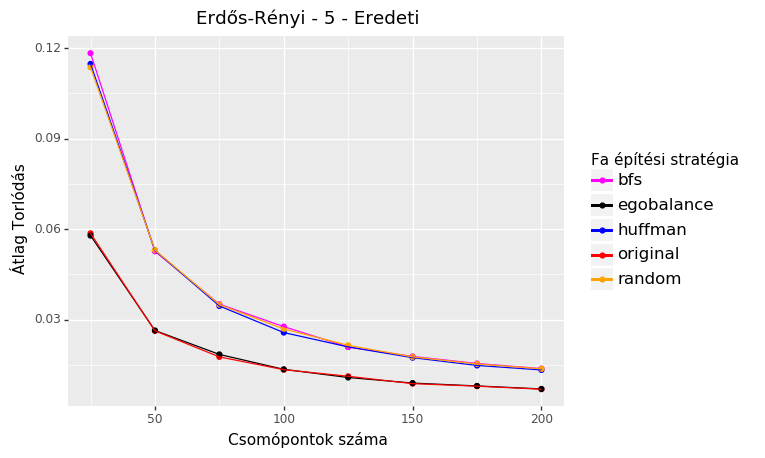

<ggplot: (130806858970)>

In [76]:
qe_erdos_con + scale_color_manual(['magenta', 'black', 'blue', 'red', 'orange'])

In [ ]:
qe_star_con.save('../documentation/pictures/star_con_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_star_con.save('../documentation/pictures/star_con_m.png', 'png',  width=4, height=3, dpi=300)

In [ ]:
qe_star_route.save('../documentation/pictures/star_len_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_star_route.save('../documentation/pictures/star_len_m.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qe_barabasi_con.save('../documentation/pictures/barabasi_con_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_barabasi_con.save('../documentation/pictures/barabasi_con_m.png', 'png',  width=4, height=3, dpi=300)

In [ ]:
qe_barabasi_route.save('../documentation/pictures/barabasi_len_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_barabasi_route.save('../documentation/pictures/barabasi_len_m.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qe_erdos_con.save('../documentation/pictures/erdos_con_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_erdos_con.save('../documentation/pictures/erdos_con_m.png', 'png',  width=4, height=3, dpi=300)

In [ ]:
qe_erdos_route.save('../documentation/pictures/erdos_len_e.png', 'png', width=4, height=3, dpi=300)

In [ ]:
qm_erdos_route.save('../documentation/pictures/erdos_len_m.png', 'png', width=4, height=3, dpi=300)

In [ ]:
q_entropy.save('../documentation/pictures/entropy.png', 'png', width=4, height=3, dpi=300)

In [ ]:
zz1.save('../documentation/pictures/density_len.png', 'png', width=4, height=3, dpi=300)

In [ ]:
zz2.save('../documentation/pictures/density_con.png', 'png', width=4, height=3, dpi=300)

In [77]:
dan_data = pd.read_csv('erdos_benchmark/original_res/results_original_delta.csv')
dan_data.head(10)

,graph,vertex_num,constant,congestion,real_congestion,avg_route_len,delta,max_delta,dan,most_congested_route,max_route_len,avg_tree_weight,most_tree_ratio,tree_count,type,start_entropy
0,erdos-renyi,25,1,4.0,0.400000,2.000000,3,2,2d,"[T0 W: 0, T4 W: 1.0, T21 W: 0]",2,0.100000,1.000000,10,original,3.321928
1,erdos-renyi,25,1,4.0,0.166667,2.000000,3,4,2d,"[T0 W: 0, T4 W: 1.0, T9 W: 0]",2,0.052632,1.000000,19,original,4.136842
2,erdos-renyi,25,1,4.0,0.181818,2.000000,3,3,2d,"[T1 W: 0, T0 W: 1.0, T11 W: 0]",2,0.071429,1.000000,14,original,3.663533
3,erdos-renyi,25,1,10.0,0.357143,1.857143,3,3,2d,"[T2 W: 0, T3 W: 1.0, T20 W: 2.0]",2,0.083333,1.800000,12,original,3.753434
4,erdos-renyi,25,1,4.0,0.133333,1.533333,3,3,2d,"[T1 W: 0, T0 W: 1.0, T24 W: 0]",2,0.083333,1.333333,12,original,4.123231
5,erdos-renyi,25,2,4.0,0.142857,1.642857,3,3,2d,"[T0 W: 0, T4 W: 1.0, T12 W: 0]",2,0.071429,1.333333,12,original,4.056657
6,erdos-renyi,25,2,8.0,0.148148,1.518519,4,4,2d,"[T20 W: 0, T13 W: 1.0, T9 W: 1.0, T24 W: 0]",3,0.077160,1.500000,12,original,4.358886
7,erdos-renyi,25,2,12.0,0.206897,1.517241,4,5,2d,"[T7 W: 0, T10 W: 2.0, T21 W: 2.0]",3,0.077586,1.777778,12,original,4.361533
8,erdos-renyi,25,2,12.0,0.206897,1.655172,4,5,2d,"[T7 W: 0, T0 W: 2.0, T18 W: 2.0]",3,0.079023,1.777778,12,original,4.365820
9,erdos-renyi,25,2,6.0,0.125000,1.666667,4,4,2d,"[T5 W: 0, T13 W: 1.0, T24 W: 0]",2,0.068910,1.600000,13,original,4.230927


In [78]:
gdan_data = dan_data[['vertex_num', 'constant', 'delta', 'max_delta', 'dan']]
gdan_data = gdan_data[gdan_data['constant'] == 5]
gdan_data

,vertex_num,constant,delta,max_delta,dan
20,25,5,10,11,2d
21,25,5,8,8,2d
22,25,5,8,8,2d
23,25,5,12,11,2d
24,25,5,8,8,2d
...,...,...,...,...,...
2370,200,5,60,12,12d
2371,200,5,60,13,12d
2372,200,5,60,14,12d
2373,200,5,60,13,12d


In [79]:
ddata = dan_data.groupby(['vertex_num', 'dan']).agg({'delta': 'max', 'max_delta': 'max'})
ddata.reset_index(inplace=True)
ddata.head()

,vertex_num,dan,delta,max_delta
0,25,10d,100,17
1,25,12d,120,17
2,25,2d,20,16
3,25,4d,40,16
4,25,6d,60,16


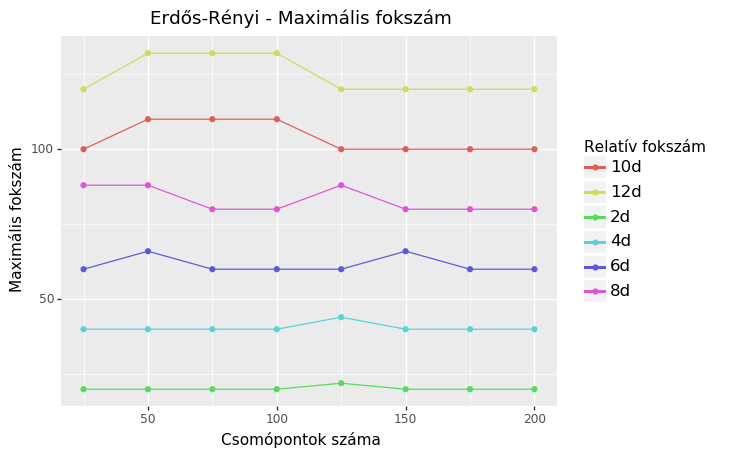

<ggplot: (-9223371906048138436)>

In [88]:
delta_max = ggplot(ddata, aes(x='vertex_num', y='delta', color='factor(dan)')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Maximális fokszám') \
    + labs(color='Relatív fokszám') \
    + ggtitle('Erdős-Rényi - Maximális fokszám') \
    + theme(legend_text=element_text(size=12))
delta_max

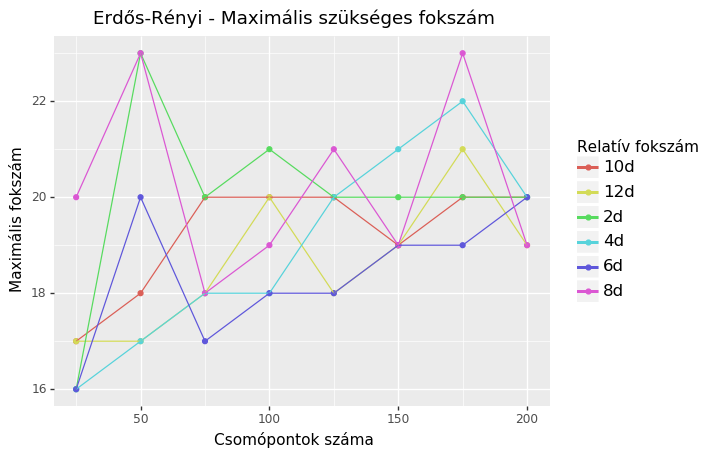

<ggplot: (-9223371906048163226)>

In [89]:
delta_req = ggplot(ddata, aes(x='vertex_num', y='max_delta', color='factor(dan)')) \
    + geom_point() \
    + geom_line() \
    + xlab('Csomópontok száma') \
    + ylab('Maximális fokszám') \
    + labs(color='Relatív fokszám') \
    + ggtitle('Erdős-Rényi - Maximális szükséges fokszám') \
    + theme(legend_text=element_text(size=12))
delta_req

In [90]:
delta_req.save('../documentation/pictures/delta_req.png', 'png', width=4, height=3, dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 4 x 3 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: ../documentation/pictures/delta_req.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [91]:
delta_max.save('../documentation/pictures/delta_max.png', 'png', width=4, height=3, dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 4 x 3 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: ../documentation/pictures/delta_max.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
